In [44]:
import pandas as pd


from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



In [9]:
df = pd.read_csv('class_glm.csv')

In [10]:
df.head()

,y,x1,x2,x3,x4,x5,x6
0,1,1764,21668,3513,48149,20499,134
1,1,212,10600,3640,18010,17192,111
2,1,637,24586,189,71757,3839,135
3,1,1723,29951,1891,5884,20,172
4,1,1711,22873,2497,31002,2093,160


In [11]:
df.corr() #project should take care of correlation

,y,x1,x2,x3,x4,x5,x6
y,1.000000,-0.020115,0.008472,0.014475,-0.000035,0.005689,-0.024909
x1,-0.020115,1.000000,0.032631,-0.023934,0.008792,-0.000153,0.044109
x2,0.008472,0.032631,1.000000,-0.024677,0.010280,-0.033115,0.025828
x3,0.014475,-0.023934,-0.024677,1.000000,-0.018839,-0.008040,-0.007404
x4,-0.000035,0.008792,0.010280,-0.018839,1.000000,0.009221,0.007990
x5,0.005689,-0.000153,-0.033115,-0.008040,0.009221,1.000000,-0.020209
x6,-0.024909,0.044109,0.025828,-0.007404,0.007990,-0.020209,1.000000


In [13]:
metrics = pd.DataFrame(df, columns = ["x1","x2","x3","x4","x5","x6"])
#metrics = df.drop(columns=["y"]) is the same to above line, when you don't want to type one by one
target = pd.DataFrame(df, columns = ["y"])

In [17]:
glm = linear_model.LogisticRegression()

In [49]:
model = glm.fit(metrics, target)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
predictions = glm.predict(metrics)

In [38]:
cm = confusion_matrix(target, predictions)
print(cm)

[[330 652]
 [315 703]]


In [39]:
total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

0.5165


In [40]:
glm.score(metrics, target)

0.5165

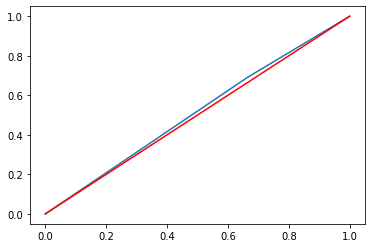

In [48]:
fpr, tpr, thresholds = roc_curve(target, predicitions)
plt.plot(fpr, tpr) #false positive rate, true positive rate
plt.plot([0,1], 'r')
plt.show()

In [42]:
logit_roc_auc = roc_auc_score(target, predictions)
print(logit_roc_auc)

0.5133093122171584
